# 使用Python实现K-Means算法

K-Means聚类算法主要分为三个步骤：

* 第一步是为待聚类的点随机寻找聚类中心
* 第二步是计算每个点到聚类中心的距离，将各个点归类到离该点最近的聚类中去
* 第三步是计算每个聚类中所有点的坐标平均值，并将这个平均值作为新的聚类中心，反复执行(2)、(3)，直到聚类中心不再进行大范围移动或者聚类次数达到要求为止

In [1]:
# -*- coding:utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class K_Means(object):
    # k是分组数
    # tolerance 中心点误差
    # max_iter 最大迭代次数
    def __init__(self, k=2, tolerance=0.0001, max_iter=300):
        self.k_ = k
        self.tolerance_ = tolerance
        self.max_iter_ = max_iter

    def fit(self, data):
        self.centers_ = {}
        for i in range(self.k_):
            self.centers_[i] = data[i]

        for i in range(self.max_iter_):
            self.clf_ = {}
            for i in range(self.k_):
                self.clf_[i] = []

            for feature in data:
                # distances = [np.linalg.norm(feature-self.centers[center]) for center in self.centers]
                distances = []
                for center in self.centers_:
                    # 欧拉距离
                    # np.sqrt(np.sum((features-self.centers_[center])**2))
                    distances.append(np.linalg.norm(feature - self.centers_[center]))
                classification = distances.index(min(distances))
                self.clf_[classification].append(feature)

            prev_centers = dict(self.centers_)
            for c in self.clf_:
                self.centers_[c] = np.average(self.clf_[c], axis=0)

            # '中心点'是否在误差范围
            optimized = True
            for center in self.centers_:
                org_centers = prev_centers[center]
                cur_centers = self.centers_[center]
                if np.sum((cur_centers - org_centers) / org_centers * 100.0) > self.tolerance_:
                    optimized = False
            if optimized:
                break

    def predict(self, p_data):
        distances = [np.linalg.norm(p_data - self.centers_[center]) for center in self.centers_]
        index = distances.index(min(distances))
        return index

{0: array([1.16666667, 1.46666667]), 1: array([7.33333333, 9.        ])}


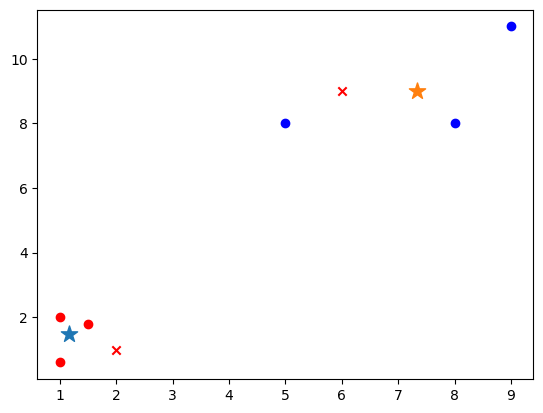

In [3]:
x = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])
k_means = K_Means(k=2)
k_means.fit(x)
print(k_means.centers_)

for center in k_means.centers_:
    plt.scatter(k_means.centers_[center][0], k_means.centers_[center][1], marker='*', s=150)

for cat in k_means.clf_:
    for point in k_means.clf_[cat]:
        plt.scatter(point[0], point[1], c=('r' if cat == 0 else 'b'))

predict = [[2, 1], [6, 9]]
for feature in predict:
    cat = k_means.predict(predict)
    plt.scatter(feature[0], feature[1], c=('r' if cat == 0 else 'b'), marker='x')

plt.show()